In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/CWC23_all_innings.csv')

In [3]:
# Explore the dataset
print(df.shape)

(1408, 20)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
print(df.isnull().sum())

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64


In [24]:
df.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins', 'strike_rate', 'economy_rate', 'overs_played'],
      dtype='object')

In [6]:
# Handle missing values
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

# Fill missing values with appropriate strategies
df['4s'] = df['4s'].fillna(0)
df['6s'] = df['6s'].fillna(0)
df['sr'] = df['sr'].fillna(df['runs_per_ball'] * 100)
df['not_out'] = df['not_out'].fillna(0)
df['mins'] = df['mins'].fillna(df.groupby('player')['mins'].transform('mean'))


Columns with missing values: ['wkts', 'overs', 'mdns', 'econ', '4s', '6s', 'sr', 'not_out', 'mins']


In [7]:
# Preprocess the dataset
# Convert data types
df['start_date'] = pd.to_datetime(df['start_date'])
df['bb_bf'] = df['bb_bf'].astype(int)
df['wicketball_prob'] = df['wicketball_prob'].astype(float)
df['runs_per_ball'] = df['runs_per_ball'].astype(float)
df['econ'] = df['econ'].astype(float)
df['sr'] = df['sr'].astype(float)
df['not_out'] = df['not_out'].astype(int)


<ipython-input-7-a2a6b8435cb0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


In [8]:
# Create additional features
df['strike_rate'] = (df['runs'] / df['bb_bf']) * 100
df['economy_rate'] = (df['runs'] / (df['bb_bf'] / 6))

In [9]:
# Explore the preprocessed dataset
print(df.head(10))

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   
5  AFG     Mujeeb Ur Rahman (AFG)        bowl     60    51   3.0   
6  ENG            AU Rashid (ENG)        bowl     48    54   3.0   
7  NED          LV van Beek (NED)        bowl     53    60   3.0   
8  BAN   Mehidy Hasan Miraz (BAN)        bowl     54    60   3.0   
9  PAK   Mohammad Wasim (1) (PAK)        bowl     60    60   3.0   

   wicketball_prob  runs_per_ball      opposition        ground  ... mdns  \
0         0.050000       0.750000  v South Africa       Chennai  ...  0.0   
1         0.050000       0.750000         v India       Lucknow  ...  2.0   
2         0.050000  

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   team             1408 non-null   object        
 1   player           1408 non-null   object        
 2   bat_or_bowl      1408 non-null   object        
 3   bb_bf            1408 non-null   int64         
 4   runs             1408 non-null   int64         
 5   wkts             562 non-null    float64       
 6   wicketball_prob  1408 non-null   float64       
 7   runs_per_ball    1408 non-null   float64       
 8   opposition       1408 non-null   object        
 9   ground           1408 non-null   object        
 10  start_date       1408 non-null   datetime64[ns]
 11  overs            562 non-null    float64       
 12  mdns             562 non-null    float64       
 13  econ             562 non-null    float64       
 14  inns             1408 non-null   int64  

In [11]:
# Team Performance Analysis
team_performance = df.groupby('team')[['runs', 'wkts']].sum().reset_index()
team_performance['avg_runs'] = team_performance['runs'] / team_performance.index.size
team_performance['avg_wkts'] = team_performance['wkts'] / team_performance.index.size
print(team_performance)

  team  runs  wkts  avg_runs  avg_wkts
0  AFG  4134  53.0     413.4       5.3
1  AUS  5234  77.0     523.4       7.7
2  BAN  4358  51.0     435.8       5.1
3  ENG  4396  65.0     439.6       6.5
4  IND  4783  94.0     478.3       9.4
5  NED  4268  63.0     426.8       6.3
6   NZ  5376  71.0     537.6       7.1
7  PAK  4786  65.0     478.6       6.5
8   SA  5097  88.0     509.7       8.8
9   SL  4366  50.0     436.6       5.0


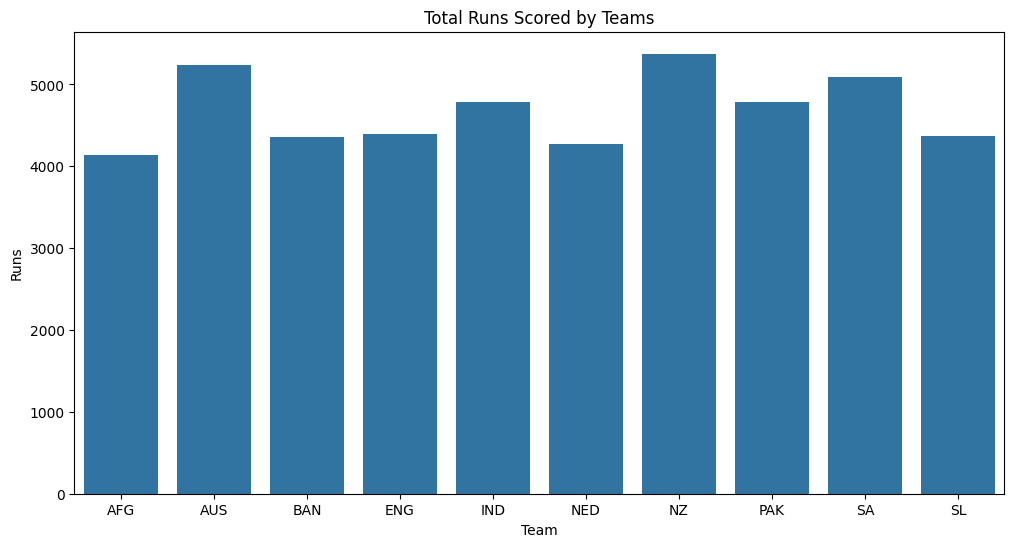

In [12]:
# Visualize team performance
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='runs', data=team_performance)
plt.title('Total Runs Scored by Teams')
plt.xlabel('Team')
plt.ylabel('Runs')
plt.show()

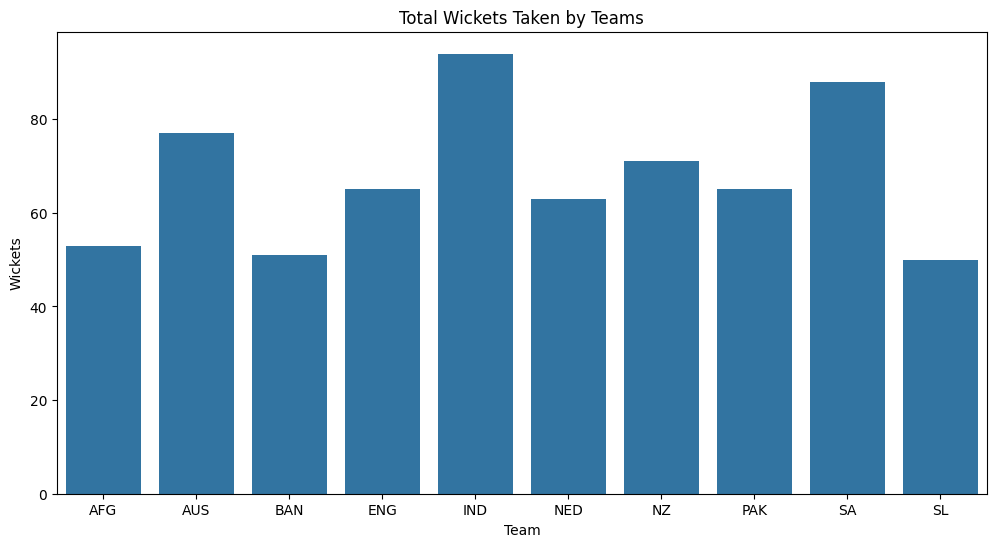

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='wkts', data=team_performance)
plt.title('Total Wickets Taken by Teams')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.show()

In [14]:
# Player Performance Analysis
player_performance = df.groupby('player')[['runs', 'wkts', 'sr', 'econ']].sum().reset_index()
player_performance = player_performance.sort_values(by='runs', ascending=False)
print(player_performance.head(10))

                       player  runs  wkts           sr   econ
110           R Ravindra (NZ)   971   5.0  1882.459740  56.19
148             V Kohli (IND)   726   1.0   968.448889   8.33
36           GJ Maxwell (AUS)   693   5.0  1389.251228  34.50
13         BFW de Leede (NED)   626  16.0  1497.173069  58.11
11   Azmatullah Omarzai (AFG)   623   7.0  1834.179206  61.86
68          LV van Beek (NED)   616  12.0  1448.338341  52.00
105          PJ Cummins (AUS)   609  13.0  1767.506209  59.06
70              M Jansen (SA)   607  17.0  1770.648742  58.58
88   Mehidy Hasan Miraz (BAN)   603  10.0  1574.822963  51.59
107            Q de Kock (SA)   594   0.0  1065.390000   0.00


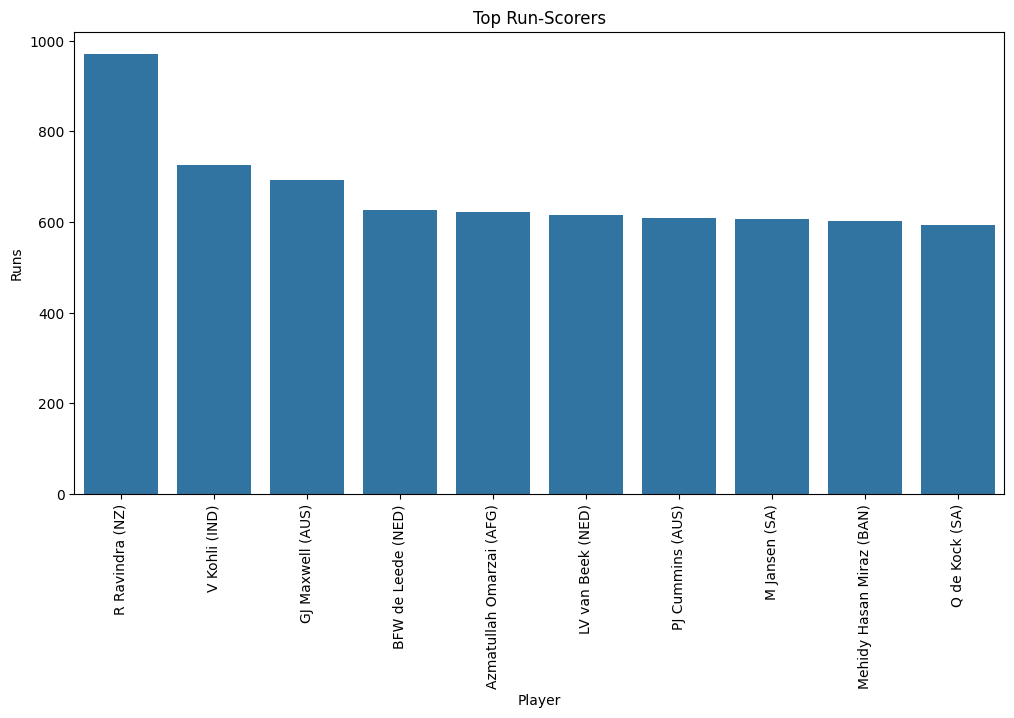

In [15]:
# Visualize player performance
plt.figure(figsize=(12, 6))
sns.barplot(x='player', y='runs', data=player_performance.head(10))
plt.title('Top Run-Scorers')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.xticks(rotation=90)
plt.show()

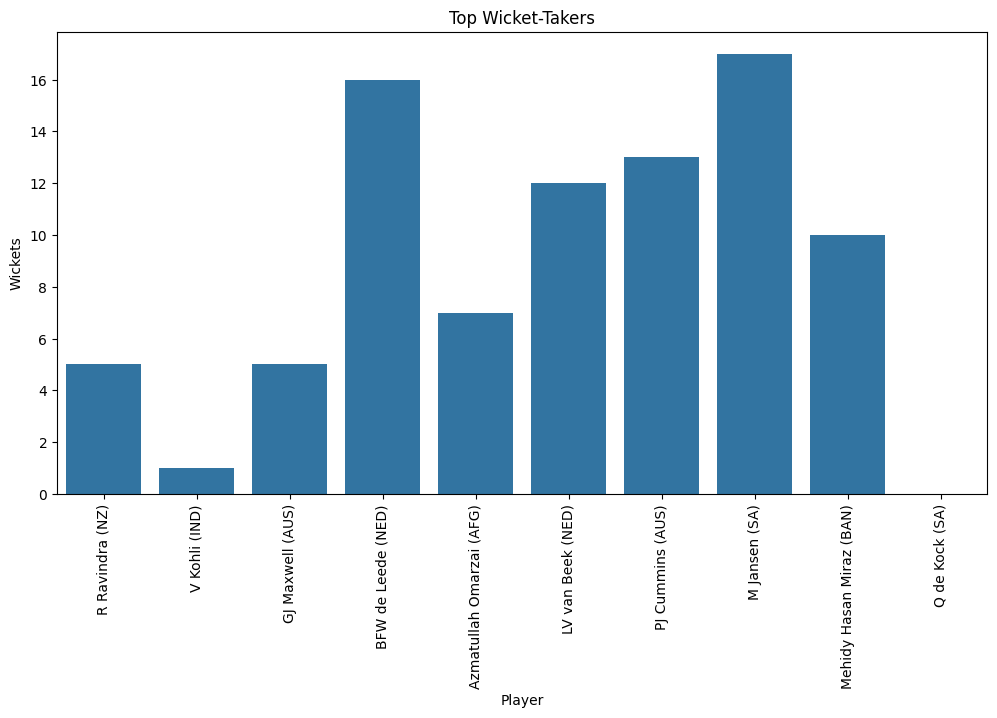

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='player', y='wkts', data=player_performance.head(10))
plt.title('Top Wicket-Takers')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Opposition and Ground Analysis
opposition_performance = df.groupby(['opposition', 'team'])[['runs', 'wkts']].sum().reset_index()
print(opposition_performance)

ground_performance = df.groupby(['ground', 'team'])[['runs', 'wkts']].sum().reset_index()
print(ground_performance)

       opposition team  runs  wkts
0   v Afghanistan  AUS   564   5.0
1   v Afghanistan  BAN   306  10.0
2   v Afghanistan  ENG   485   8.0
3   v Afghanistan  IND   525   8.0
4   v Afghanistan  NED   341   3.0
..            ...  ...   ...   ...
86    v Sri Lanka  IND   386  10.0
87    v Sri Lanka  NED   479   5.0
88    v Sri Lanka   NZ   340  10.0
89    v Sri Lanka  PAK   659   9.0
90    v Sri Lanka   SA   726  10.0

[91 rows x 4 columns]
       ground team  runs  wkts
0   Ahmedabad  AFG   473   5.0
1   Ahmedabad  AUS   523  10.0
2   Ahmedabad  ENG  1073  11.0
3   Ahmedabad  IND   378  10.0
4   Ahmedabad   NZ   557   9.0
..        ...  ...   ...   ...
67   Wankhede  ENG   549   7.0
68   Wankhede  IND  1093  20.0
69   Wankhede   NZ   693   4.0
70   Wankhede   SA  1148  19.0
71   Wankhede   SL   391   6.0

[72 rows x 4 columns]


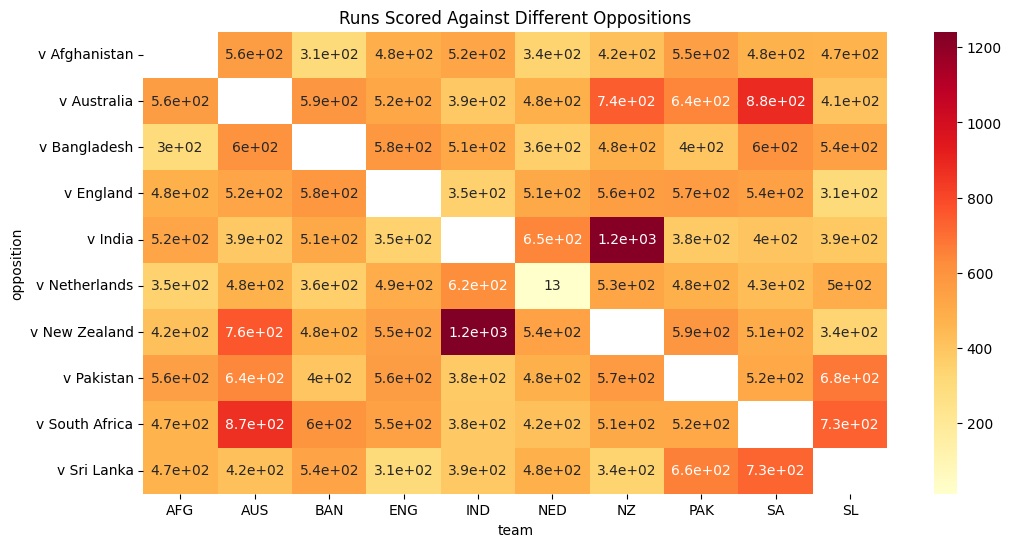

In [18]:
# Visualize opposition and ground performance
plt.figure(figsize=(12, 6))
sns.heatmap(opposition_performance.pivot(index='opposition', columns='team', values='runs'), annot=True, cmap='YlOrRd')
plt.title('Runs Scored Against Different Oppositions')
plt.show()

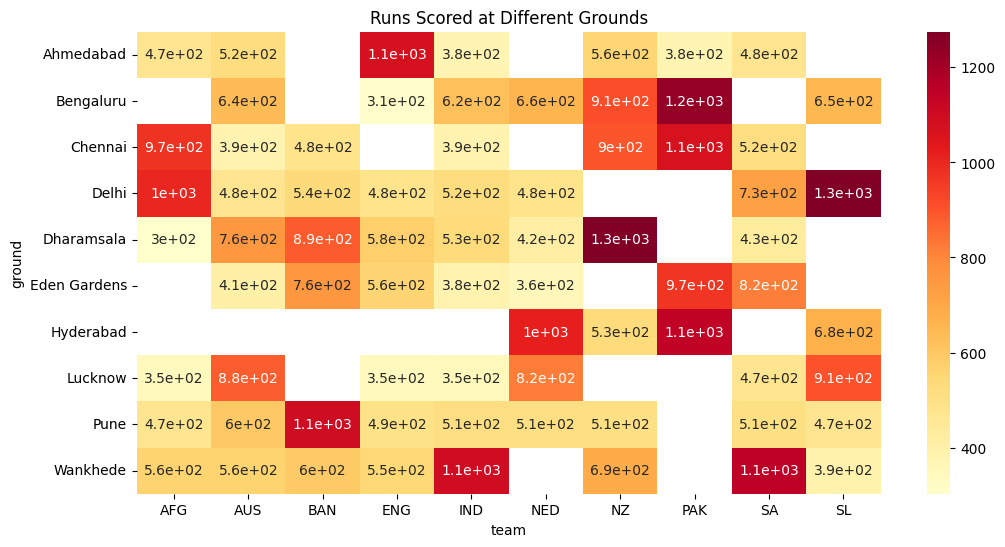

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(ground_performance.pivot(index='ground', columns='team', values='runs'), annot=True, cmap='YlOrRd')
plt.title('Runs Scored at Different Grounds')
plt.show()

In [20]:
# Temporal Analysis
df['start_date'] = pd.to_datetime(df['start_date'])
df['overs_played'] = df['overs']
temporal_performance = df.groupby(['start_date', 'team'])[['runs', 'wkts']].sum().reset_index()

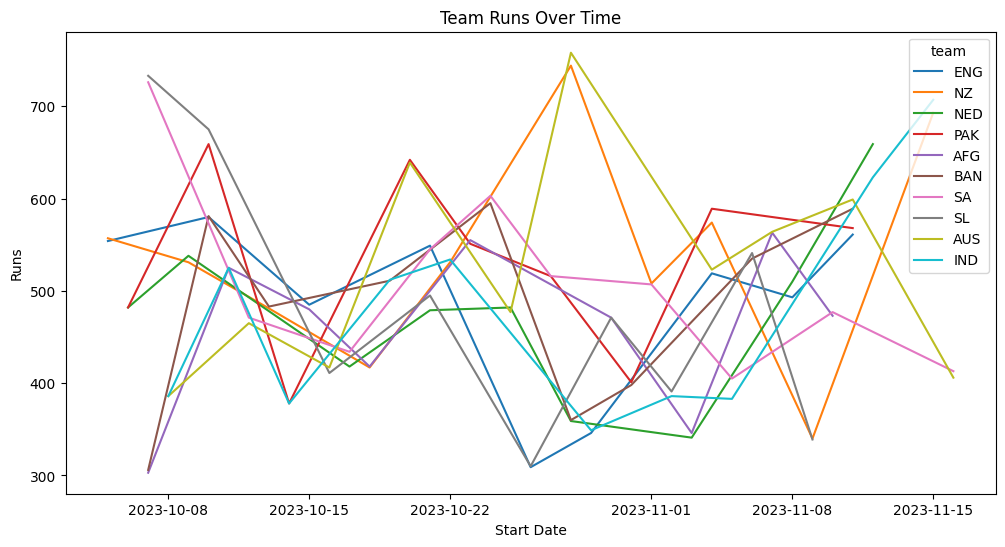

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', hue='team', data=temporal_performance)
plt.title('Team Runs Over Time')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.show()

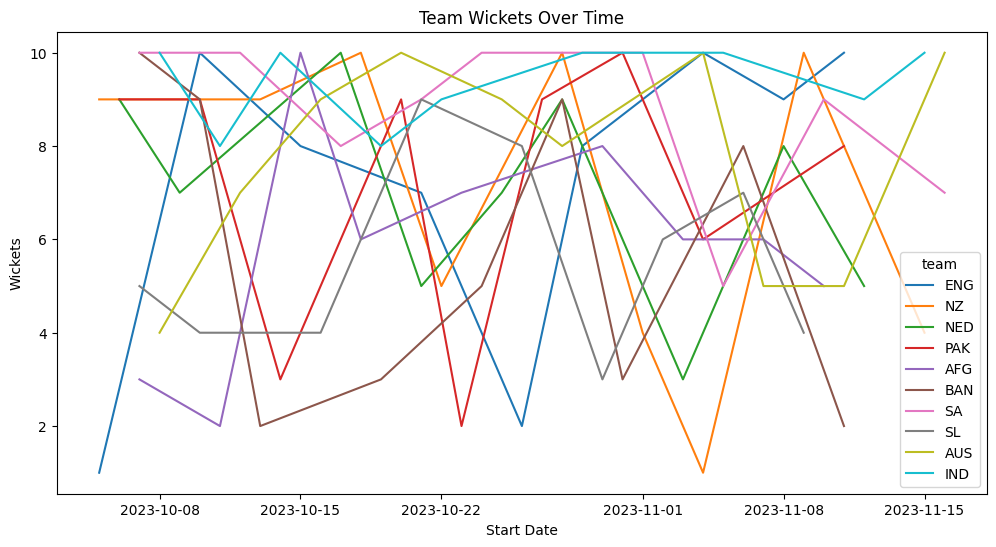

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', hue='team', data=temporal_performance)
plt.title('Team Wickets Over Time')
plt.xlabel('Start Date')
plt.ylabel('Wickets')
plt.show()

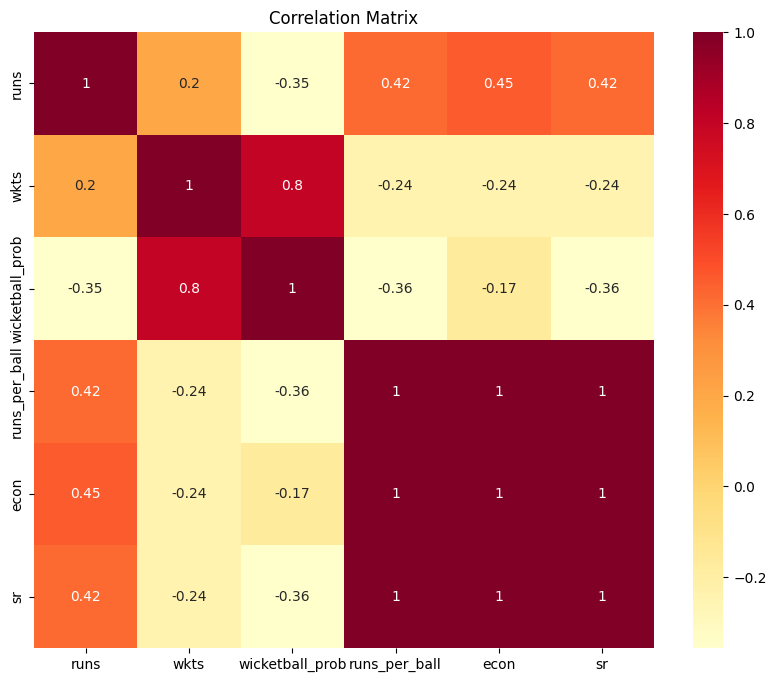

In [23]:
# Correlation Analysis
corr_matrix = df[['runs', 'wkts', 'wicketball_prob', 'runs_per_ball', 'econ', 'sr']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()